# 1.

In [ ]:
# Github: https://github.com/marcuschen001

# 2.

i.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

$f(x) = A cos(Bx) + Cx + D$

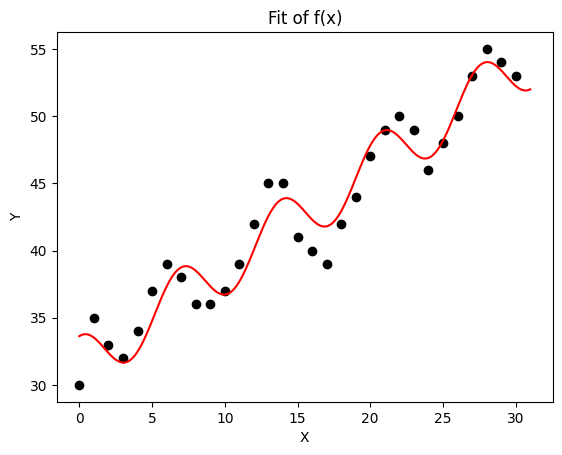

In [2]:
# Function f
def f (a, b, c, d, x):
  return a * np.cos(b * x) + c * x + d

# Error formula
def velfit(c, x, y):
    e2 = np.sqrt((1 / len(x)) * np.sum((f(c[0], c[1], c[2], c[3], x) - y)**2))
    return e2

# Initial guess
v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (f(c[0], c[1], c[2], c[3], x2))

plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fit of f(x)')
plt.show()

ii.

In [ ]:
print(c)

[ 2.17168187  0.9093249   0.73247849 31.4529185 ]


In [ ]:
# Values we plan to sweep through for A, B, C, and D
A = np.arange(0, 5.01, 0.01)
B = np.arange(0, 5.01, 0.01)
C = np.arange(0, 5.01, 0.01)
D = np.arange(30, 35.01, 0.01)

#Empty loss landscape arrays to fill
loss_1 = np.zeros((len(A), len(B)))
loss_2 = np.zeros((len(A), len(C)))
loss_3 = np.zeros((len(A), len(D)))
loss_4 = np.zeros((len(B), len(C)))
loss_5 = np.zeros((len(B), len(D)))
loss_6 = np.zeros((len(C), len(D)))

# Fill up landscape
for i in range (len(A)):
  for j in range (len(B)):
    loss_1[i][j] = velfit([A[i], B[j], c[2], c[3]], X, Y)
    loss_2[i][j] = velfit([A[i], c[1], C[j], c[3]], X, Y)
    loss_3[i][j] = velfit([A[i], c[1], c[2], D[j]], X, Y)
    loss_4[i][j] = velfit([c[0], B[i], C[j], c[3]], X, Y)
    loss_5[i][j] = velfit([c[0], B[i], c[2], D[j]], X, Y)
    loss_6[i][j] = velfit([c[0], c[1], C[i], D[j]], X, Y)

Text(0, 0.5, 'C / 0.01')

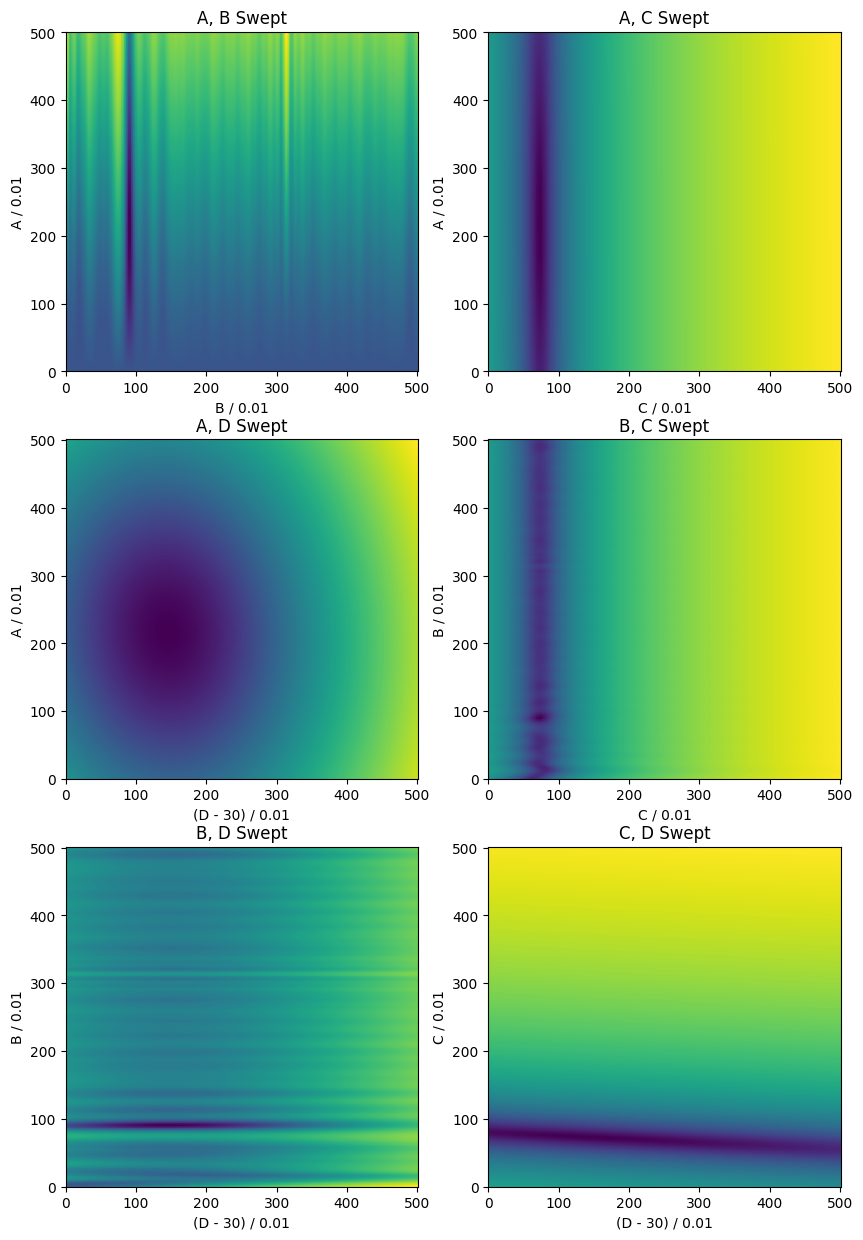

In [ ]:
# Change to log scale to reduce severity of high values
fig = plt.figure(figsize=(10, 15))
plt.subplot(321)
plt.title('A, B Swept')
plt.pcolor(np.log(loss_1))
plt.xlabel('B / 0.01')
plt.ylabel('A / 0.01')
plt.subplot(322)
plt.title('A, C Swept')
plt.pcolor(np.log(loss_2))
plt.xlabel('C / 0.01')
plt.ylabel('A / 0.01')
plt.subplot(323)
plt.title('A, D Swept')
plt.pcolor(np.log(loss_3))
plt.xlabel('(D - 30) / 0.01')
plt.ylabel('A / 0.01')
plt.subplot(324)
plt.title('B, C Swept')
plt.pcolor(np.log(loss_4))
plt.xlabel('C / 0.01')
plt.ylabel('B / 0.01')
plt.subplot(325)
plt.title('B, D Swept')
plt.pcolor(np.log(loss_5))
plt.xlabel('(D - 30) / 0.01')
plt.ylabel('B / 0.01')
plt.subplot(326)
plt.title('C, D Swept')
plt.pcolor(np.log(loss_6))
plt.xlabel('(D - 30) / 0.01')
plt.ylabel('C / 0.01')

When you only sweep A and B or B and D, you get multiple stripes of lwo values parallel to values of B. In the case of A and C, B and C, and B and D, there are a low value stripes parallel to the value of C. In the case of A and D, there is a "crater" of low values. 

It seems that the value of C and the value of B has a profound effect on the function's LSE error overall, with C being more influential than B as seen in the B and C sweep.

For all the values, the absolute minimum seems to be around the areas that were predicted by the scipy optimize function. 

iii.

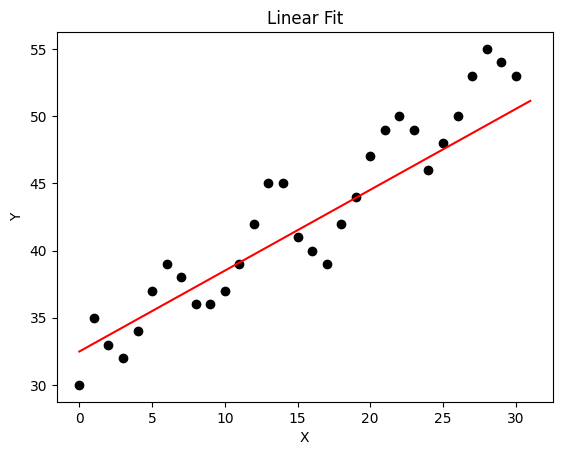

In [3]:
def velfit2(c, x, y):
    e3 = np.sqrt((1 / len(x)) * np.sum((c[0] * x + c[1] - y)**2))
    return e3

v02 = np.ones(2)

res2= opt.minimize(velfit2, v02, args=(X[0:20], Y[0:20]), method='Nelder-Mead')

c2 = res2.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = c2[0] * x2 + c2[1]

plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Fit')
plt.show()

In [ ]:
print("Training Data: " + str(velfit2(c2, X[0:20], Y[0:20])))
print("Testing Data: " + str(velfit2(c2, X[20:31], Y[20:31])))

Training Data: 2.242749387090776
Testing Data: 3.363619366080294


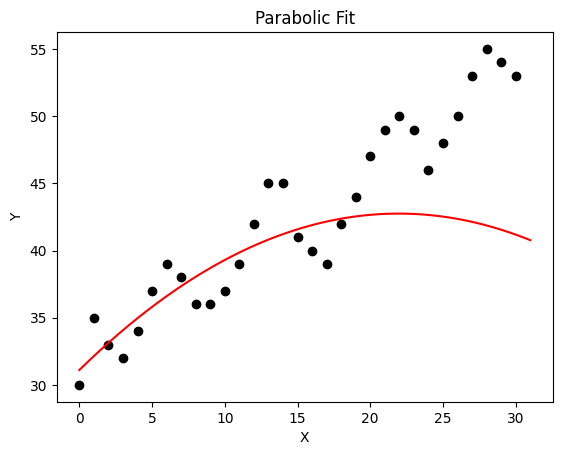

In [4]:
def velfit3(c, x, y):
    e3 = np.sqrt((1 / len(x)) * np.sum((c[0] * x ** 2 + c[1] * x + c[2] - y)**2))
    return e3

v03 = np.ones(3)

res3= opt.minimize(velfit3, v03, args=(X[0:20], Y[0:20]), method='Nelder-Mead')

c3= res3.x

yfit2 = c3[0] * x2 ** 2 + c3[1] * x2 + c3[2]

plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parabolic Fit')
plt.show()

In [ ]:
print("Training Data: " + str(velfit3(c3, X[0:20], Y[0:20])))
print("Testing Data: " + str(velfit3(c3, X[20:31], Y[20:31])))

Training Data: 2.1255393483520155
Testing Data: 8.71366660302094


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


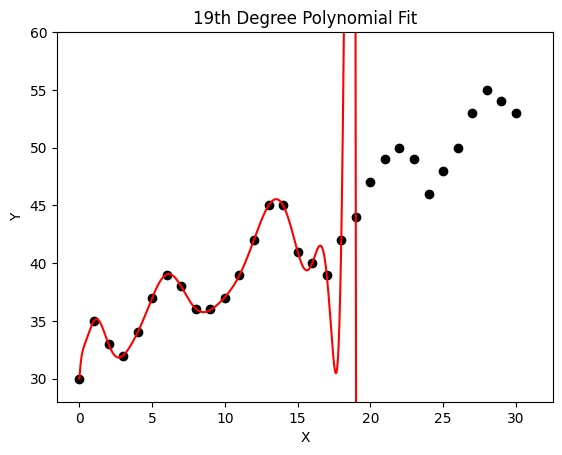

In [5]:
def f4 (c, x):
  result = 0
  for i in range (len(c)):
    result = result + (c[i] * x ** (len(c) - 1 - i))
  return result

def velfit4(f, x, y):
    e3 = np.sqrt((1 / len(x)) * np.sum((f - y)**2))
    return e3

c4 = np.polyfit(X[0:20], Y[0:20], 19)

# Automatially guesses coefficients that will result in an optimal fit
yfit2 = f4(c4, x2)

plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('19th Degree Polynomial Fit')
plt.ylim((28, 60))
plt.show()

In [ ]:
f = yfit2[::100]
print("Training Data: " + str(velfit4(f[0:20], X[0:20], Y[0:20])))
print("Testing Data: " + str(velfit4(f[20:31], X[20:31], Y[20:31])))

Training Data: 0.028351481277572182
Testing Data: 28626352734.19632


iv.

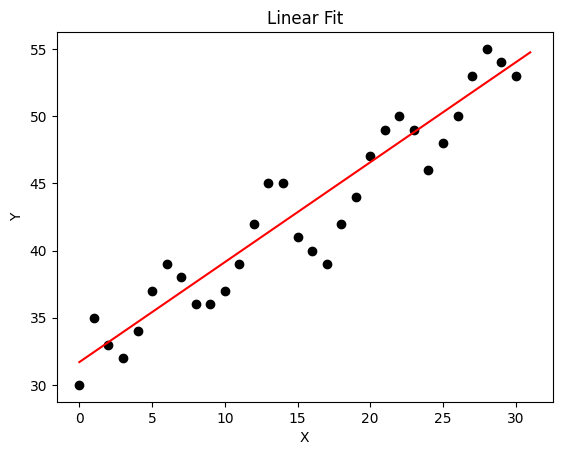

In [6]:
X_mod = np.concatenate((X[0:10], X[-10:]))
Y_mod = np.concatenate((Y[0:10], Y[-10:]))

res2= opt.minimize(velfit2, v02, args=(X_mod, Y_mod), method='Nelder-Mead')

c2 = res2.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = c2[0] * x2 + c2[1]

plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Fit')
plt.show()

In [7]:
print("Training Data: " + str(velfit2(c2, X_mod, Y_mod)))
print("Testing Data: " + str(velfit2(c2, X[10:22], Y[10:22])))

Training Data: 1.8516699046029184
Testing Data: 2.73091076355018


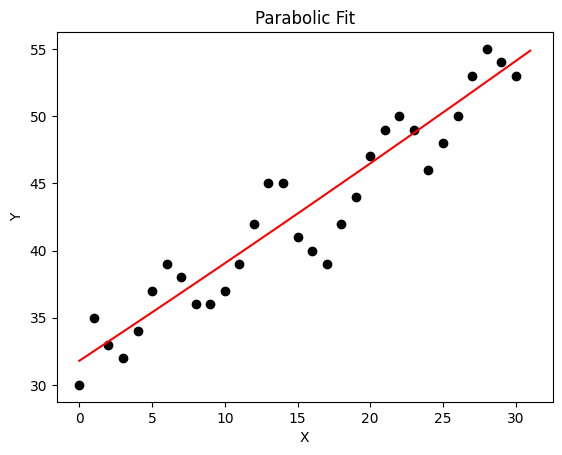

In [8]:
res3= opt.minimize(velfit3, v03, args=(X_mod, Y_mod), method='Nelder-Mead')

c3= res3.x

yfit2 = c3[0] * x2 ** 2 + c3[1] * x2 + c3[2]

plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parabolic Fit')
plt.show()

In [9]:
print("Training Data: " + str(velfit3(c3, X_mod, Y_mod)))
print("Testing Data: " + str(velfit3(c3, X[10:22], Y[10:22])))

Training Data: 1.8508364117779978
Testing Data: 2.7052339602955877


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


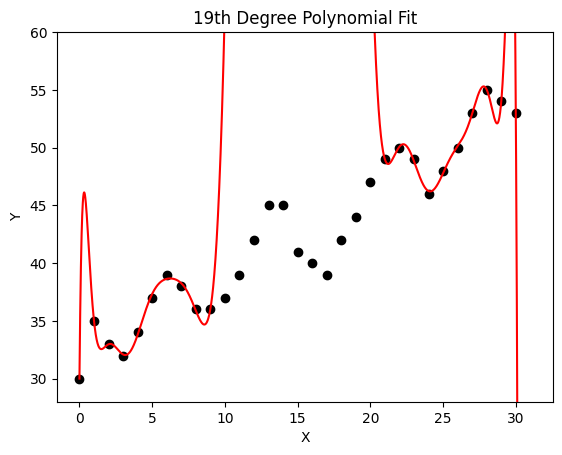

In [10]:
yfit2 = f4(np.polyfit(X_mod, Y_mod, 19), x2)

plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.ylim((28, 60))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('19th Degree Polynomial Fit')
plt.show()

In [11]:
f = yfit2[::100]
print("Training Data: " + str(velfit4(np.concatenate((f[0:10], f[-10:])), X_mod, Y_mod)))
print("Testing Data: " + str(velfit4(f[10:22], X[10:22], Y[10:22])))

Training Data: 532.5689882067522
Testing Data: 463.31672158927245


In comparison to the results in iii., the fits in iv. made by training with datapoints from both of the ends result in a better prediction of the testing data than the fits made by training with only the first 20 datapoints. 

With a directly linear fit, the least-square error was reduced for both the training and the testing data by about 0.391 and 0.633 respectively. With the parabolic fit, the training data the least-square error was reduced by about 0.27, but the testing data was reduced by a factor of about 3.22 from its original length.

While the overall mean square error becomes worse for the training data with the 19th-degree polynomial in iv. in comparison to iii., the testing data mean square error is reduced by a factor of over 59 million. The results are still horrendous because of overfitting, but the testing data prediction becomes a lot more accurate in iv. rather than iii.